In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd

In [3]:
import datetime as dt


# Reflect Tables into SQLAlchemy ORM

In [274]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func,inspect

In [5]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [183]:
# reflect an existing database into a new model
Base = automap_base()

# reflect the tables
Base.prepare(engine, reflect=True)


In [7]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [16]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station
Measurement

sqlalchemy.ext.automap.measurement

In [9]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Climate Analysis

In [68]:
inspector = inspect(engine)
inspector.get_table_names()
columns = inspector.get_columns('Measurement')
for column in columns:
    print(column["name"], column["type"])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [208]:
inspector = inspect(engine)
inspector.get_table_names()
columns = inspector.get_columns('Station')
for column in columns:
    print(column["name"], column["type"])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [318]:
#pull data into df
# Sort the dataframe by date
conn = engine.connect()
#Method-1
#Measurement_df = pd.read_sql_query('select * from Measurement where prcp is not NULL order by date desc;', conn)
#Method-2
Measurement_df = pd.read_sql_table("measurement",conn)

Measurement_df

,id,station,date,prcp,tobs
0,1,USC00519397,2010-01-01,0.08,65.0
1,2,USC00519397,2010-01-02,0.00,63.0
2,3,USC00519397,2010-01-03,0.00,74.0
3,4,USC00519397,2010-01-04,0.00,76.0
4,5,USC00519397,2010-01-06,NaN,73.0
...,...,...,...,...,...
19545,19546,USC00516128,2017-08-19,0.09,71.0
19546,19547,USC00516128,2017-08-20,NaN,78.0
19547,19548,USC00516128,2017-08-21,0.56,76.0
19548,19549,USC00516128,2017-08-22,0.50,76.0


In [319]:
#get max date
max_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first()
max_date

('2017-08-23')

In [320]:

one_year_ago = dt.datetime.strptime(max_date[0], "%Y-%m-%d") - dt.timedelta(days=366)
one_year_ago


datetime.datetime(2016, 8, 22, 0, 0)

In [321]:
oneyr_prcp =  session.query(Measurement.date, Measurement.prcp).\
    filter(Measurement.date >= one_year_ago).\
    order_by(Measurement.date).all()
oneyr_prcp

[('2016-08-23', 0.0),
 ('2016-08-23', 0.15),
 ('2016-08-23', 0.05),
 ('2016-08-23', None),
 ('2016-08-23', 0.02),
 ('2016-08-23', 1.79),
 ('2016-08-23', 0.7),
 ('2016-08-24', 0.08),
 ('2016-08-24', 2.15),
 ('2016-08-24', 2.28),
 ('2016-08-24', None),
 ('2016-08-24', 1.22),
 ('2016-08-24', 2.15),
 ('2016-08-24', 1.45),
 ('2016-08-25', 0.08),
 ('2016-08-25', 0.08),
 ('2016-08-25', 0.0),
 ('2016-08-25', 0.0),
 ('2016-08-25', 0.21),
 ('2016-08-25', 0.06),
 ('2016-08-25', 0.11),
 ('2016-08-26', 0.0),
 ('2016-08-26', 0.03),
 ('2016-08-26', 0.02),
 ('2016-08-26', 0.04),
 ('2016-08-26', 0.0),
 ('2016-08-26', 0.01),
 ('2016-08-27', 0.0),
 ('2016-08-27', 0.18),
 ('2016-08-27', 0.02),
 ('2016-08-27', 0.0),
 ('2016-08-27', 0.12),
 ('2016-08-27', None),
 ('2016-08-28', 0.01),
 ('2016-08-28', 0.14),
 ('2016-08-28', 0.14),
 ('2016-08-28', 0.14),
 ('2016-08-28', 0.6),
 ('2016-08-28', 2.07),
 ('2016-08-29', 0.0),
 ('2016-08-29', 0.17),
 ('2016-08-29', 0.04),
 ('2016-08-29', None),
 ('2016-08-29', 0.0),

In [ ]:
#Method -2 
#Previous year's Precipitation:
#connection = engine.connect()
#max_date = connection.execute( "select max(date) from Measurement" )
#for i in max_date:
#    print(i[0])
#    maxdate=i[0]
    
#one_year_ago = dt.datetime.strptime(maxdate, "%Y-%m-%d") - dt.timedelta(days=366)
#one_year_ago


#oneyr_prcp = connection.execute('SELECT date,prcp FROM Measurement WHERE date >= :val', {'val': one_year_ago})


In [125]:
oneyr_prcp_df = pd.DataFrame(oneyr_prcp)
oneyr_prcp_df

,date,prcp
0,2016-08-22,0.40
1,2016-08-22,0.94
2,2016-08-22,NaN
3,2016-08-22,NaN
4,2016-08-22,0.40
...,...,...
2232,2017-08-22,0.50
2233,2017-08-23,0.00
2234,2017-08-23,0.00
2235,2017-08-23,0.08


In [126]:
oneyr_prcp_df.set_index('date', inplace=True)
oneyr_prcp_df

,prcp
date,
2016-08-22,0.40
2016-08-22,0.94
2016-08-22,NaN
2016-08-22,NaN
2016-08-22,0.40
...,...
2017-08-22,0.50
2017-08-23,0.00
2017-08-23,0.00


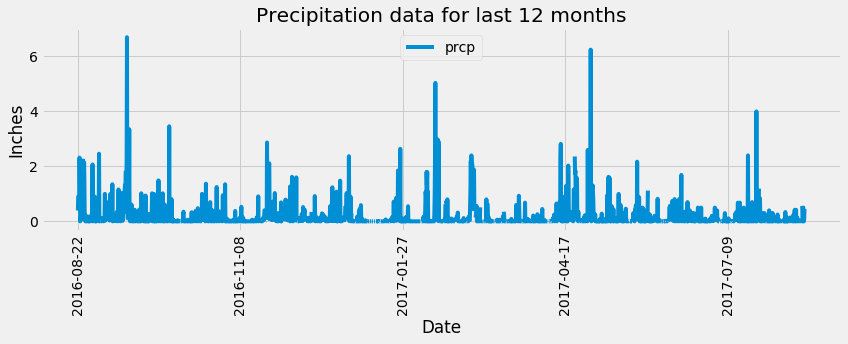

In [128]:
fig,ax = plt.subplots(figsize =(12,5))

oneyr_prcp_df.plot(ax=ax,x_compat = True)

plt.xticks(rotation="vertical")
plt.legend(loc='upper center')

plt.title("Precipitation data for last 12 months")
plt.xlabel("Date")
plt.ylabel("Inches")
plt.tight_layout()
plt.savefig("Images/Prcp_data.png")

plt.show()


In [129]:
# Use Pandas to calcualte the summary statistics for the precipitation data
oneyr_prcp_df.describe()

,prcp
count,2026.000000
mean,0.179437
std,0.463989
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [133]:
#Method  - 1
# Design a query to show how many stations are available in this dataset?
unique_stations = pd.read_sql_query('select count(distinct station) as station_count from Measurement;', conn)
unique_stations

,station_count
0,9


In [134]:
#Method  - 2
# Design a query to show how many stations are available in this dataset?
unique_stations =session.query(Measurement.station).distinct().count()
unique_stations

9

In [137]:
#Method  - 1
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.
active_stations = pd.read_sql_query('select station,count(station) as freq_station from Measurement group by station order by freq_station desc;', conn)
active_stations

,station,freq_station
0,USC00519281,2772
1,USC00519397,2724
2,USC00513117,2709
3,USC00519523,2669
4,USC00516128,2612
5,USC00514830,2202
6,USC00511918,1979
7,USC00517948,1372
8,USC00518838,511


In [138]:
#Method  - 2
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.
active_stations1 =  session.query(Measurement.station, 
                                func.count(Measurement.station)).group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).all()

active_stations1

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [147]:
#Method - 1 
#most_active station:
max_freq=active_stations["freq_station"].max()
max_df = active_stations[active_stations['freq_station'] == max_freq]
max_df
most_active_station_id=max_df["station"][0]
print(most_active_station_id)

USC00519281


In [148]:
#Method - 2 
#most_active station:
most_active_station_id1=active_stations1[0][0]
print(most_active_station_id1)

USC00519281


In [145]:
#Method1
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature of the most active station?
max_station_data = pd.read_sql_query("select min(tobs),max(tobs),avg(tobs) from Measurement where station ='USC00519281';", conn)
max_station_data

,min(tobs),max(tobs),avg(tobs)
0,54.0,85.0,71.663781


In [150]:
#Method - 2
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature of the most active station?
most_active_temps = session.query(func.min(Measurement.tobs), func.max(Measurement.tobs),
                                  func.avg(Measurement.tobs)).filter(Measurement.station == most_active_station_id1).all()
print(f"Most Active Station data:")
print(f"Lowest_temp: {most_active_temps[0][0]} Highest_temp: {most_active_temps[0][1]} Average_temp: {round(most_active_temps[0][2], 1)}")

Most Active Station data:
Lowest_temp: 54.0 Highest_temp: 85.0 Average_temp: 71.7


In [155]:
#Method - 1
# Choose the station with the highest number of temperature observations.
max_obs_id_df = pd.read_sql_query("select station,count(tobs) as nob,date,prcp from Measurement group by station order by nob desc;", conn)
max_obs_id_df

max_freq=max_obs_id_df["nob"].max()
max_obs_id2 = max_obs_id_df[max_obs_id_df['nob'] == max_freq]
max_obs_id2
max_obs_id=max_obs_id2["station"][0]
print(max_obs_id)

USC00519281


In [153]:
#Method - 2
# Choose the station with the highest number of temperature observations.
max_obs_id = session.query(Measurement.station, func.count(Measurement.tobs)).group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).first()
max_obs_id= max_obs_id[0]
max_obs_id

'USC00519281'

In [160]:
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
max_station_data = pd.read_sql_query("select * from Measurement where station='USC00519281';",conn)
max_station_data

max_station_data

,id,station,date,prcp,tobs
0,12188,USC00519281,2010-01-01,0.15,70.0
1,12189,USC00519281,2010-01-02,0.00,62.0
2,12190,USC00519281,2010-01-03,0.00,74.0
3,12191,USC00519281,2010-01-04,0.00,75.0
4,12192,USC00519281,2010-01-05,0.00,74.0
...,...,...,...,...,...
2767,14955,USC00519281,2017-08-14,0.00,77.0
2768,14956,USC00519281,2017-08-15,0.32,77.0
2769,14957,USC00519281,2017-08-16,0.12,76.0
2770,14958,USC00519281,2017-08-17,0.01,76.0


In [181]:
station_oneyr_prcp =  session.query( Measurement.tobs).filter(Measurement.date >= year_ago).filter(Measurement.station == max_obs_id).all()
station_oneyr_prcp_df = pd.DataFrame(station_oneyr_prcp,columns=['temperature'])
station_oneyr_prcp_df

,temperature
0,77.0
1,80.0
2,80.0
3,75.0
4,73.0
...,...
346,77.0
347,77.0
348,76.0
349,76.0


In [317]:
#Method 2 
#Previous year's Precipitation for max_stations:
connection = engine.connect()
max_date = connection.execute( "select max(date) from Measurement" )
for i in max_date:
    #print(i[0])
    maxdate=i[0]
    
one_year_ago = dt.datetime.strptime(maxdate, "%Y-%m-%d") - dt.timedelta(days=366)
one_year_ago


max_station_id_data = connection.execute('select max(freq_count), station from \
                                                (select count(station) as freq_count \
                                                        ,station \
                                                        from Measurement \
                                                        where station in (SELECT station \
                                                                            FROM Measurement \
                                                                            WHERE date >= :val) \
                                                        group by station \
                                                        order by count(station) desc)', {'val': one_year_ago})
for i in max_station_id_data:
    max_station_id = i[1]
    
#Query the last 12 months of temperature observation data for this station   
max_station_oneyr_data = connection.execute('select date, tobs from Measurement \
                                                WHERE date >= :val and \
                                                    station = :val2', {'val': one_year_ago, 'val2':max_station_id})
for i in max_station_oneyr_data:
    print(i)

('2016-08-23', 77.0)
('2016-08-24', 77.0)
('2016-08-25', 80.0)
('2016-08-26', 80.0)
('2016-08-27', 75.0)
('2016-08-28', 73.0)
('2016-08-29', 78.0)
('2016-08-30', 77.0)
('2016-08-31', 78.0)
('2016-09-01', 80.0)
('2016-09-02', 80.0)
('2016-09-03', 78.0)
('2016-09-04', 78.0)
('2016-09-05', 78.0)
('2016-09-06', 73.0)
('2016-09-07', 74.0)
('2016-09-08', 80.0)
('2016-09-09', 79.0)
('2016-09-10', 77.0)
('2016-09-11', 80.0)
('2016-09-12', 76.0)
('2016-09-13', 79.0)
('2016-09-14', 75.0)
('2016-09-15', 79.0)
('2016-09-16', 78.0)
('2016-09-17', 79.0)
('2016-09-18', 78.0)
('2016-09-19', 78.0)
('2016-09-20', 76.0)
('2016-09-21', 74.0)
('2016-09-22', 77.0)
('2016-09-23', 78.0)
('2016-09-24', 79.0)
('2016-09-25', 79.0)
('2016-09-26', 77.0)
('2016-09-27', 80.0)
('2016-09-28', 78.0)
('2016-09-29', 78.0)
('2016-09-30', 78.0)
('2016-10-01', 77.0)
('2016-10-02', 79.0)
('2016-10-03', 79.0)
('2016-10-04', 79.0)
('2016-10-05', 79.0)
('2016-10-06', 75.0)
('2016-10-07', 76.0)
('2016-10-08', 73.0)
('2016-10-09'

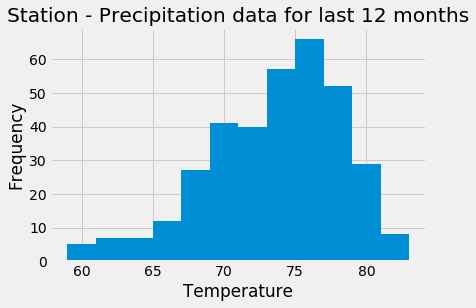

In [207]:
station_oneyr_prcp_df.hist(bins=12,column='temperature')
plt.title("Station - Precipitation data for last 12 months")
plt.xlabel("Temperature")
plt.ylabel("Frequency")

plt.savefig("Images/Station_Prcp_data.png")

plt.show()

## Bonus Challenge Assignment

In [185]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

[(62.0, 69.57142857142857, 74.0)]


In [186]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.
# Trip Dates:
start_d='2016-01-28'
end_d ='2016-02-11'
my_trip_data = calc_temps(start_d,end_d)
my_trip_data

[(56.0, 68.39583333333333, 78.0)]

In [200]:
#dataframe
mytrip_df = pd.DataFrame(my_trip_data, columns=['TMIN', 'TAVG', 'TMAX'])
mytrip_df

,TMIN,TAVG,TMAX
0,56.0,68.395833,78.0


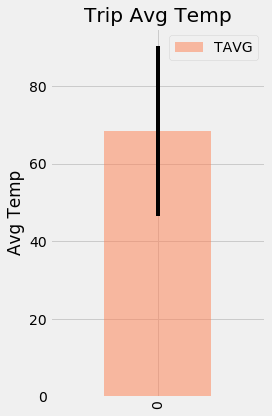

In [206]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)
y_err=(mytrip_df['TMAX'] - mytrip_df['TMIN'])
mytrip_df.plot.bar(y='TAVG', yerr=y_err, title='Trip Avg Temp', color='coral', alpha=0.5, figsize=(4,6))
plt.ylabel("Avg Temp")
plt.tight_layout()
plt.savefig("Images/Trip_Avg_Temp.png")

plt.show()

Station:
id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT

Measurement:
id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT

In [210]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation
#Trip Dates:
start_d='2016-01-28'
end_d ='2016-02-11'

query='''Select m.station
            ,sum(m.prcp) as "Total Prcp"
            ,s.name as "Station Name"
            ,s.latitude 
            ,s.longitude
            ,s.elevation
        from 
            Measurement m
            inner join Station s on
                s.station=m.station
        where 
            m.date between '2016-01-28' AND '2016-02-11'
        group by m.station;
'''


total_rf_per_station = pd.read_sql_query(query,conn)
total_rf_per_station


,station,Total Prcp,Station Name,latitude,longitude,elevation
0,USC00513117,0.82,"KANEOHE 838.1, HI US",21.42340,-157.80150,14.6
1,USC00514830,0.89,"KUALOA RANCH HEADQUARTERS 886.9, HI US",21.52130,-157.83740,7.0
2,USC00516128,1.01,"MANOA LYON ARBO 785.2, HI US",21.33310,-157.80250,152.4
3,USC00517948,0.00,"PEARL CITY, HI US",21.39340,-157.97510,11.9
4,USC00519281,0.83,"WAIHEE 837.5, HI US",21.45167,-157.84889,32.9
5,USC00519397,0.09,"WAIKIKI 717.2, HI US",21.27160,-157.81680,3.0
6,USC00519523,0.42,"WAIMANALO EXPERIMENTAL FARM, HI US",21.33556,-157.71139,19.5


In [217]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

[(62.0, 69.15384615384616, 77.0)]

In [235]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

normals = []

# Set the start and end date of the trip
start_d='2016-01-28'
end_d ='2016-02-11'
# Use the start and end date to create a range of dates
date_df = pd.date_range(start_d,end_d,freq='D')
date_df

# Stip off the year and save a list of %m-%d strings
date_only=date_df.strftime("%m-%d")
print(date_only)

# Loop through the list of %m-%d strings and calculate the normals for each date
for i in date_only:
    normals.append(daily_normals(i))
    
    
print(normals)


Index(['01-28', '01-29', '01-30', '01-31', '02-01', '02-02', '02-03', '02-04',
       '02-05', '02-06', '02-07', '02-08', '02-09', '02-10', '02-11'],
      dtype='object')
[[(62.0, 69.03703703703704, 77.0)], [(64.0, 69.14, 76.0)], [(60.0, 67.12962962962963, 77.0)], [(60.0, 68.47368421052632, 74.0)], [(56.0, 68.14035087719299, 78.0)], [(59.0, 68.85964912280701, 77.0)], [(58.0, 67.79661016949153, 77.0)], [(61.0, 68.14035087719299, 76.0)], [(59.0, 69.6842105263158, 80.0)], [(58.0, 70.38983050847457, 77.0)], [(60.0, 69.0, 77.0)], [(56.0, 66.75438596491227, 74.0)], [(57.0, 67.58928571428571, 75.0)], [(56.0, 68.41666666666667, 76.0)], [(61.0, 69.25, 79.0)]]


In [247]:
date_df

DatetimeIndex(['2016-01-28', '2016-01-29', '2016-01-30', '2016-01-31',
               '2016-02-01', '2016-02-02', '2016-02-03', '2016-02-04',
               '2016-02-05', '2016-02-06', '2016-02-07', '2016-02-08',
               '2016-02-09', '2016-02-10', '2016-02-11'],
              dtype='datetime64[ns]', freq='D')

In [224]:
date_only

Index(['01-28', '01-29', '01-30', '01-31', '02-01', '02-02', '02-03', '02-04',
       '02-05', '02-06', '02-07', '02-08', '02-09', '02-10', '02-11'],
      dtype='object')

In [243]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index
#new_df = pd.DataFrame({'normals':normals ,'date':date_only})
#new_df
new_normals = []
for i in normals:
    new_normals.append(i[0])

print(new_normals)

[(62.0, 69.03703703703704, 77.0), (64.0, 69.14, 76.0), (60.0, 67.12962962962963, 77.0), (60.0, 68.47368421052632, 74.0), (56.0, 68.14035087719299, 78.0), (59.0, 68.85964912280701, 77.0), (58.0, 67.79661016949153, 77.0), (61.0, 68.14035087719299, 76.0), (59.0, 69.6842105263158, 80.0), (58.0, 70.38983050847457, 77.0), (60.0, 69.0, 77.0), (56.0, 66.75438596491227, 74.0), (57.0, 67.58928571428571, 75.0), (56.0, 68.41666666666667, 76.0), (61.0, 69.25, 79.0)]


In [269]:
new_df = pd.DataFrame(new_normals,columns = ["tmin","tmax","tavg"])
date_df = pd.to_datetime(date_df)
new_df["Date"] = date_df

new_df.set_index('Date',inplace=True)
new_df

,tmin,tmax,tavg
Date,,,
2016-01-28,62.0,69.037037,77.0
2016-01-29,64.0,69.140000,76.0
2016-01-30,60.0,67.129630,77.0
2016-01-31,60.0,68.473684,74.0
2016-02-01,56.0,68.140351,78.0
2016-02-02,59.0,68.859649,77.0
2016-02-03,58.0,67.796610,77.0
2016-02-04,61.0,68.140351,76.0
2016-02-05,59.0,69.684211,80.0


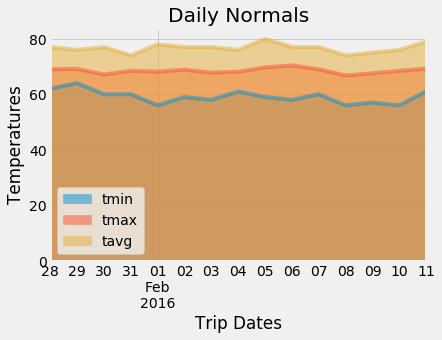

In [310]:
# Plot the daily normals as an area plot with `stacked=False`
new_df.plot(kind='area',stacked=False,title="Daily Normals")
plt.xlabel("Trip Dates")
plt.ylabel("Temperatures")
plt.savefig("Images/Daily_Normals.png")
plt.show()